IMAGE CLASSIFIER

In [11]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
''' 
Large models tend to take up all the available vram so to avoid that we need to use the below lines of code.
'''

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [6]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
img_exts

['jpeg', 'jpg', 'bmp', 'png']

In [8]:
os.listdir(data_dir)

['happy', 'sad']

In [10]:
img = cv2.imread(os.path.join('data', 'happy', '2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg'))
type(img)

numpy.ndarray

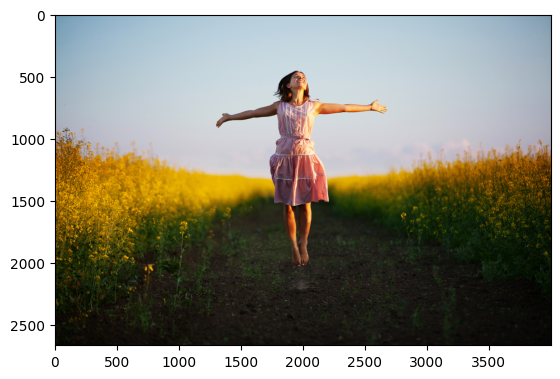

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, image)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with image {}'.format(img_path))
            #os.remove(img_path)

Image not in ext list data\happy\112595057-group-of-diverse-friends-taking-a-selfie-at-the-beach.jpg
Image not in ext list data\happy\2560px-Happy_People.jpg
Image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happy\96420bde9e974aa9c679cf2024905919d4f4e4a459439134d0ec6ff5cdfd2ebf-rimg-w1196-h796-gmir.jpg
Image not in ext list data\happy\depositphotos_25307393-stock-photo-relaxing-at-hom2.jpg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\hile-collaborating-on-a-new-project-in-an-office-group-of-diverse-2159023891.jpg
Image not in ext list data\sad\39681222.jpg
Image not in ext list data\sad\39843138-sad-man.jpg
Image not in ext list data\sad\CC_HE_1221887081_SituationalDepression.jpg
Image not in ext list data\sad\depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
Image not in ext list data\sad\origin-144.jpg
Image not in ext list data\sad\sad-pe

In [ ]:
tf.data.Dataset??

In [17]:
import numpy as np

In [57]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 157 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

In [25]:
batch[0].shape

(32, 256, 256, 3)

In [27]:
batch[1]    #sad-1 happy-0

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1])

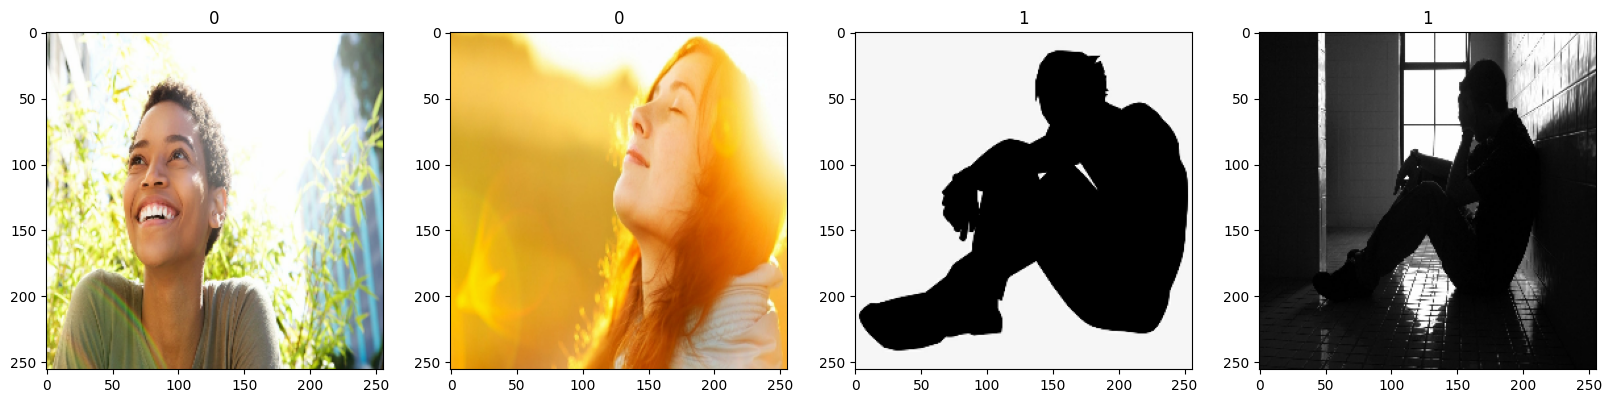

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scaling Data

In [60]:
data = data.map(lambda x,y: (x/255, y))

In [37]:
scaled_iterator = data.as_numpy_iterator()

In [38]:
batch = scaled_iterator.next()

In [39]:
batch[0].max()

1.0

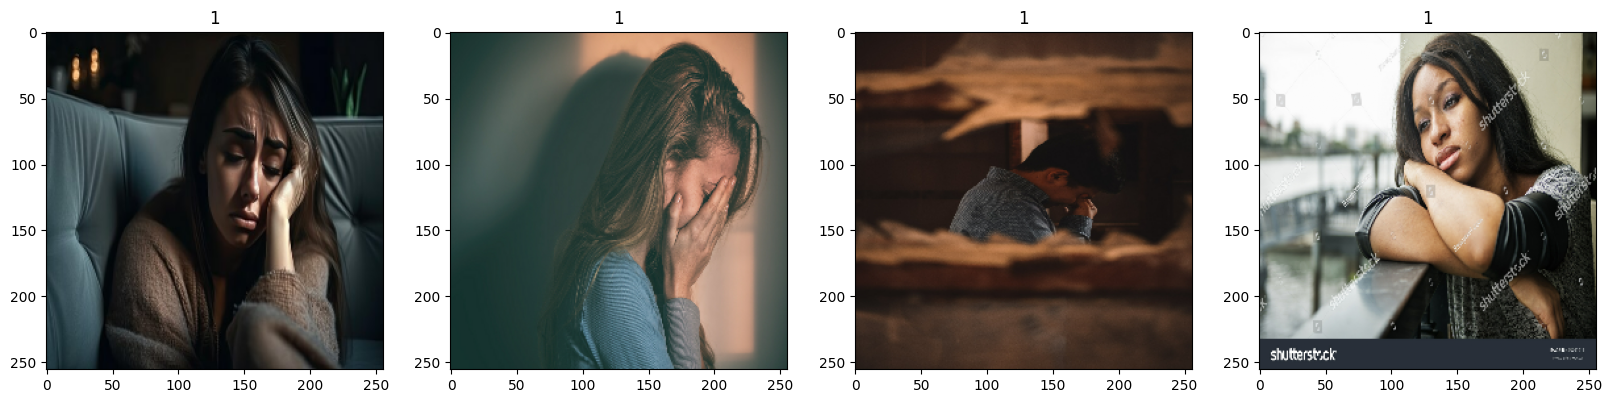

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Split Data

In [42]:
len(data)

5

In [48]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [52]:
train_size + test_size + val_size

5

In [53]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Deep Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape =(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [66]:
logdir = 'logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 12s 3s/step - loss: 1.5267 - accuracy: 0.5729 - val_loss: 2.6093 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 8s 2s/step - loss: 2.4398 - accuracy: 0.3646 - val_loss: 0.8021 - val_accuracy: 0.4062
Epoch 3/20
3/3 [==============================] - 9s 3s/step - loss: 0.7112 - accuracy: 0.4688 - val_loss: 0.6611 - val_accuracy: 0.6875
Epoch 4/20
3/3 [==============================] - 8s 2s/step - loss: 0.6832 - accuracy: 0.5312 - val_loss: 0.6695 - val_accuracy: 0.6250
Epoch 5/20
3/3 [==============================] - 8s 2s/step - loss: 0.6768 - accuracy: 0.5521 - val_loss: 0.6489 - val_accuracy: 0.5938
Epoch 6/20
3/3 [==============================] - 8s 2s/step - loss: 0.6619 - accuracy: 0.5833 - val_loss: 0.6722 - val_accuracy: 0.5938
Epoch 7/20
3/3 [==============================] - 8s 2s/step - loss: 0.6636 - accuracy: 0.5729 - val_loss: 0.6324 - val_accuracy: 0.6562
Epoch 8/20
3/3 [========================

Performance

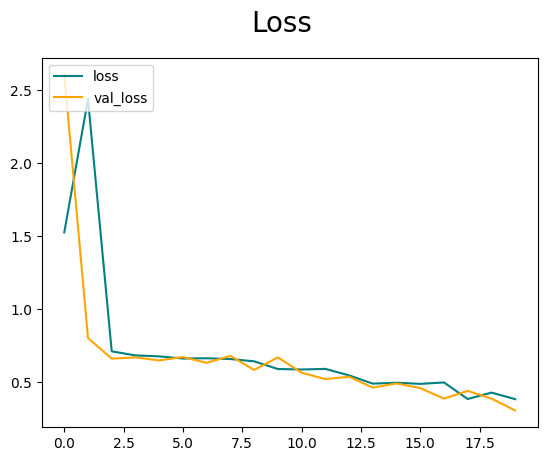

In [69]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Accuracy

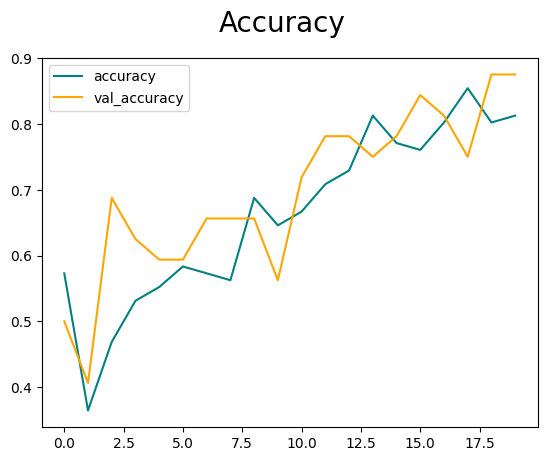

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 432ms/step


In [75]:
print(f' Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

 Precision: 1.0, Recall: 0.5714285969734192, Accuracy: 0.7931034564971924


In [76]:
import cv2

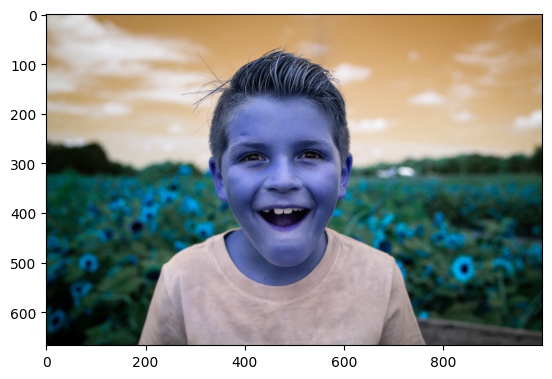

In [83]:
img = cv2.imread('happytest.jpeg')
plt.imshow(img)
plt.show()

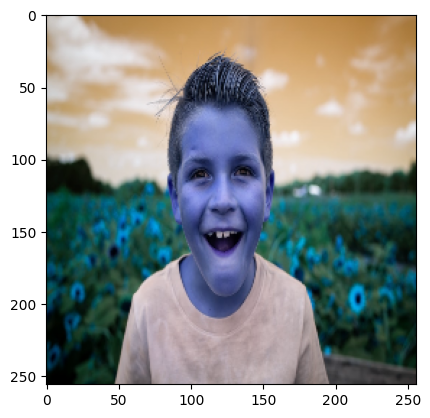

In [84]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [85]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 75ms/step


In [86]:
yhat

array([[0.14664544]], dtype=float32)

In [87]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [88]:
from tensorflow.keras.models import load_model

In [91]:
model.save(os.path.join('models','imageclassifier.h5'))

In [93]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [94]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 186ms/step


array([[0.14664544]], dtype=float32)